# Predicting the Instrinsic Valuation of Fine Art

For long, the art industry has grappled with issues such as industry opacity, data bias, artwork variance, and subjective evaluations, hindering an accurate assessment of an artwork's worth.

Art appraisal remains heavily reliant on the “trained eye”, helmed by external factors beyond the formal qualities of the work; despite the growing availability of sophisticated digital tools which complement traditional qualitative analysis, offering a data-driven alternative. Machine learning-based regression models and neural networks also derive more objective and accurate valuations, assisting art collectors and appraisers in their decision-making. Furthermore, the integration of sentiment analysis and natural language processing (NLP) facilitate the assessment of an artwork's influence and cultural impact by analyzing textual data from detailed art analysis and public surveys. 

Throughout this project, I aim to integrate the framework of “Critical Questions for Big Data” by Danah Boyd and Kate Crawford with the insights of Diana Greenwald in her project “Painting by Numbers”. Crucially, draw on the research of Jules Prown, who pioneered quantitative analysis in art research. This investigation into the application of digital tools and artificial intelligence (AI) in art analysis intends to address the longstanding challenges in the holistic valuation of art; this fosters a more transparent and informed art market.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Main Dataset

The primary source of data at the center of this research will be a Github repository named "Painting by Numbers" (Greenwald, 2021).

<br> This dataset is built upon Jules Prown's work on quantitative analysis within art research and includes metadata about the paintings which provide essential information for training and evaluating. By leveraging this dataset, we can analyze the characteristics and attributes of the artworks, as well as their associated numerical features. Additionally, we can develop and refine machine learning models capable of automatically identifying and classifying artworks based on their visual features. This is a prime meta-dataset to be analyzed in conjunction with other data such as data on the public's opinion of art styles, their popularity and art market sales records to gain greater understanding into the artistic features and potential relationships with value and influence.

In [2]:
# Import the main dataset that sets the framework for this projevct
# Load the dataset into a Pandas DataFrame and get rid of that "Unnamed: 0" column; it has to do with how the CSV was saved.
artwork_data = pd.read_csv('artDataset.csv')
del(artwork_data['Unnamed: 0'])

artwork_data['Date'] = pd.to_datetime(artwork_data['yearCreation'], errors='coerce')
artwork_data = artwork_data.dropna(subset=['Date'])

artwork_data.sort_values('yearCreation', ascending=True, inplace=True)

artwork_data.head(5)

,price,artist,title,yearCreation,signed,condition,period,movement,Date
25,34000,Adolf Schreyer,Arab Chief,1850,Signed Ad. Schreyer (lower left),The canvas is not lined.Fine craquelure in the...,19th Century,Realism,1850-01-01
134,10000,Felix Schlesinger,Untitled,1850,Signed in upper left recto,Not examined out of frame.Rubbing of frame cau...,19th Century,Realism,1850-01-01
306,3600,Ferdinand Bassot,Pretty in Pink,1875,Signed F Bassot lower right,The canvas is relined. Very fine pigment separ...,19th Century,Realism,1875-01-01
119,12000,Amedeo Simonetti,The Harem's Cobbler,1875,Signed Amedeo Simonetti and inscribed Roma (lo...,"Watercolor and gouache on card, hinged to a ba...",19th Century,Traditional,1875-01-01
184,7150,Edward Moran,Boy and His Boat,1875,Signed lower left recto,Not examined out of frame.Some cracking to pai...,19th Century,Realism,1875-01-01


# Dataset Exploration

In this section, I'll be visualizing various interpretations of the two data sets. 

<function matplotlib.pyplot.show(close=None, block=None)>

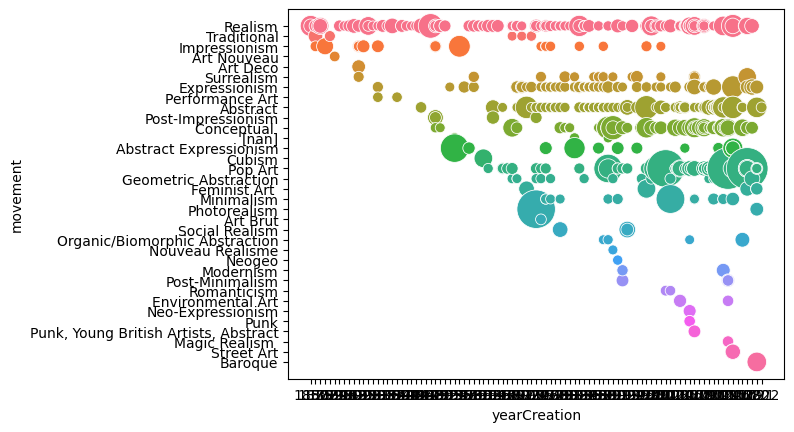

In [3]:
#quick visualisation of the data using a scatter plot

plot = sns.scatterplot(
    data=artwork_data, 
    x="yearCreation", y="movement", hue="movement", 
    size="price", sizes=(50, 900),
)

#I am removing the legend as it hides critical visualization
plt.legend ([],[],frameon=False)
plt.show



As observed, the older the artwork is, the higher the value it tends to fetch.

[Text(0, 0, 'Realism'),
 Text(1, 0, 'Abstract'),
 Text(2, 0, 'Expressionism'),
 Text(3, 0, 'Pop Art'),
 Text(4, 0, 'Conceptual '),
 Text(5, 0, 'Impressionism'),
 Text(6, 0, 'Surrealism'),
 Text(7, 0, 'Geometric Abstraction'),
 Text(8, 0, 'Minimalism'),
 Text(9, 0, 'Abstract Expressionism'),
 Text(10, 0, 'Feminist Art '),
 Text(11, 0, 'Organic/Biomorphic Abstraction'),
 Text(12, 0, 'Traditional'),
 Text(13, 0, 'Post-Minimalism'),
 Text(14, 0, 'Nouveau Réalisme'),
 Text(15, 0, 'Photorealism'),
 Text(16, 0, 'Post-Impressionism'),
 Text(17, 0, '[nan]'),
 Text(18, 0, 'Street Art'),
 Text(19, 0, 'Social Realism'),
 Text(20, 0, 'Performance Art'),
 Text(21, 0, 'Modernism'),
 Text(22, 0, 'Environmental Art'),
 Text(23, 0, 'Punk'),
 Text(24, 0, 'Romanticism'),
 Text(25, 0, 'Neo-Expressionism'),
 Text(26, 0, 'Magic Realism '),
 Text(27, 0, 'Punk, Young British Artists, Abstract'),
 Text(28, 0, 'Art Nouveau'),
 Text(29, 0, 'Art Deco'),
 Text(30, 0, 'Neogeo'),
 Text(31, 0, 'Cubism'),
 Text(32, 0, 

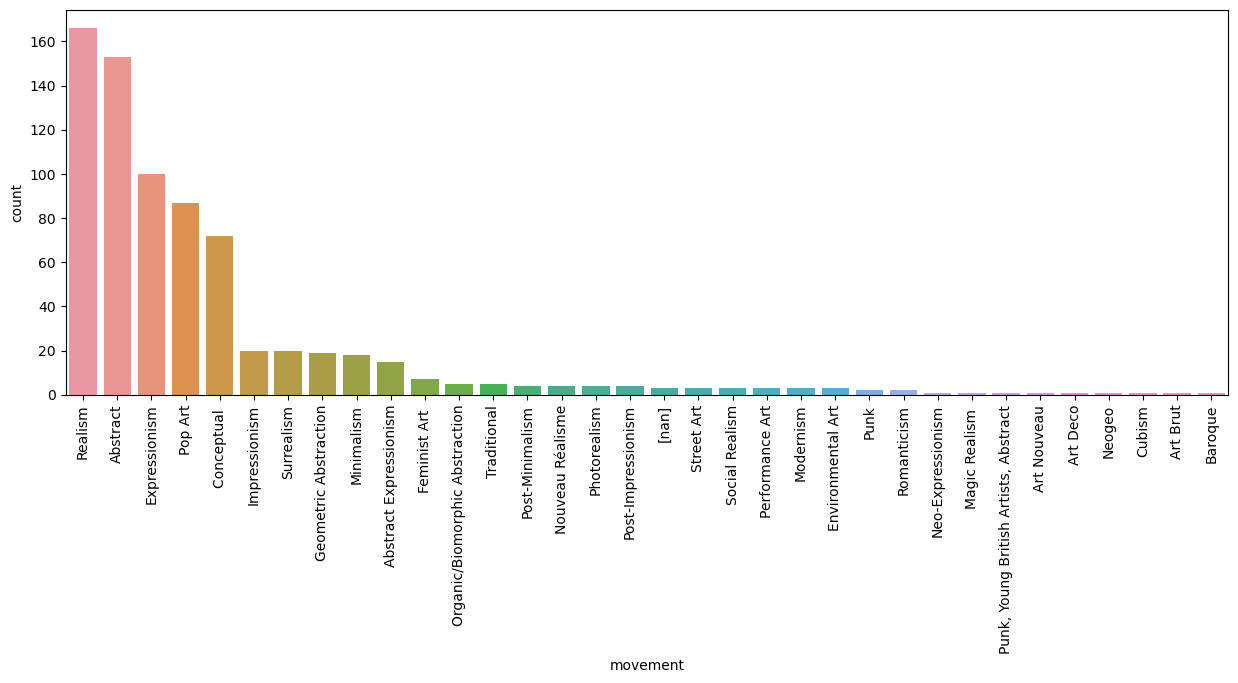

In [4]:
# print the value counts of the categories
plt.figure(figsize=(15,5))
ax = sns.countplot(x = artwork_data['movement'], orient='v', order = artwork_data['movement'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

<Figure size 1600x1000 with 0 Axes>

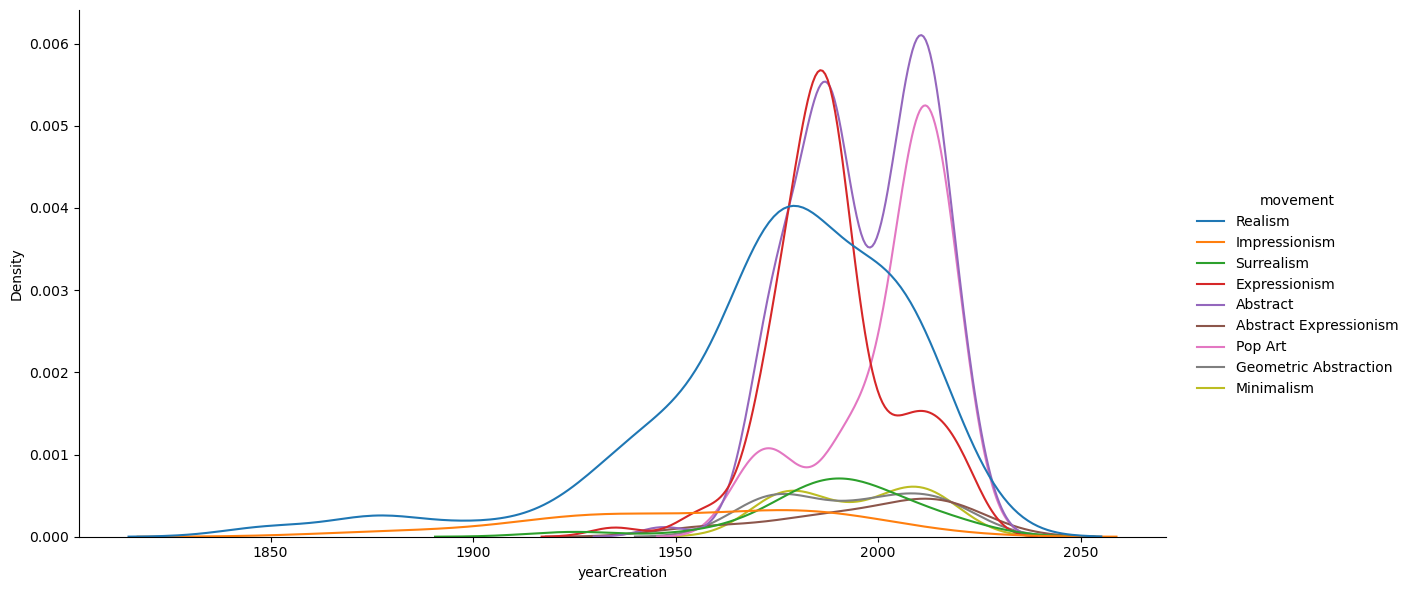

In [5]:
# Convert yearCreation from string to numeric
artwork_data['yearCreation'] = pd.to_numeric(artwork_data['yearCreation'])


# Print Sales Counts per Year and Movement
df_artwork_data_filtered = artwork_data[artwork_data['movement'].isin([
    'Realism', 
    'Abstract', 
    'Expressionism', 
    'Pop Art', 
    'Conceptual', 
    'Surrealism', 
    'Impressionism',
    'Geometric Abstraction',
    'Minimalism',
    'Abstract Expressionism',
    'Feminist Art'])]

plt.figure(figsize=(16,10))
ax = sns.displot(x = 'yearCreation', hue="movement", data = df_artwork_data_filtered, kind="kde", height=6, aspect=2)

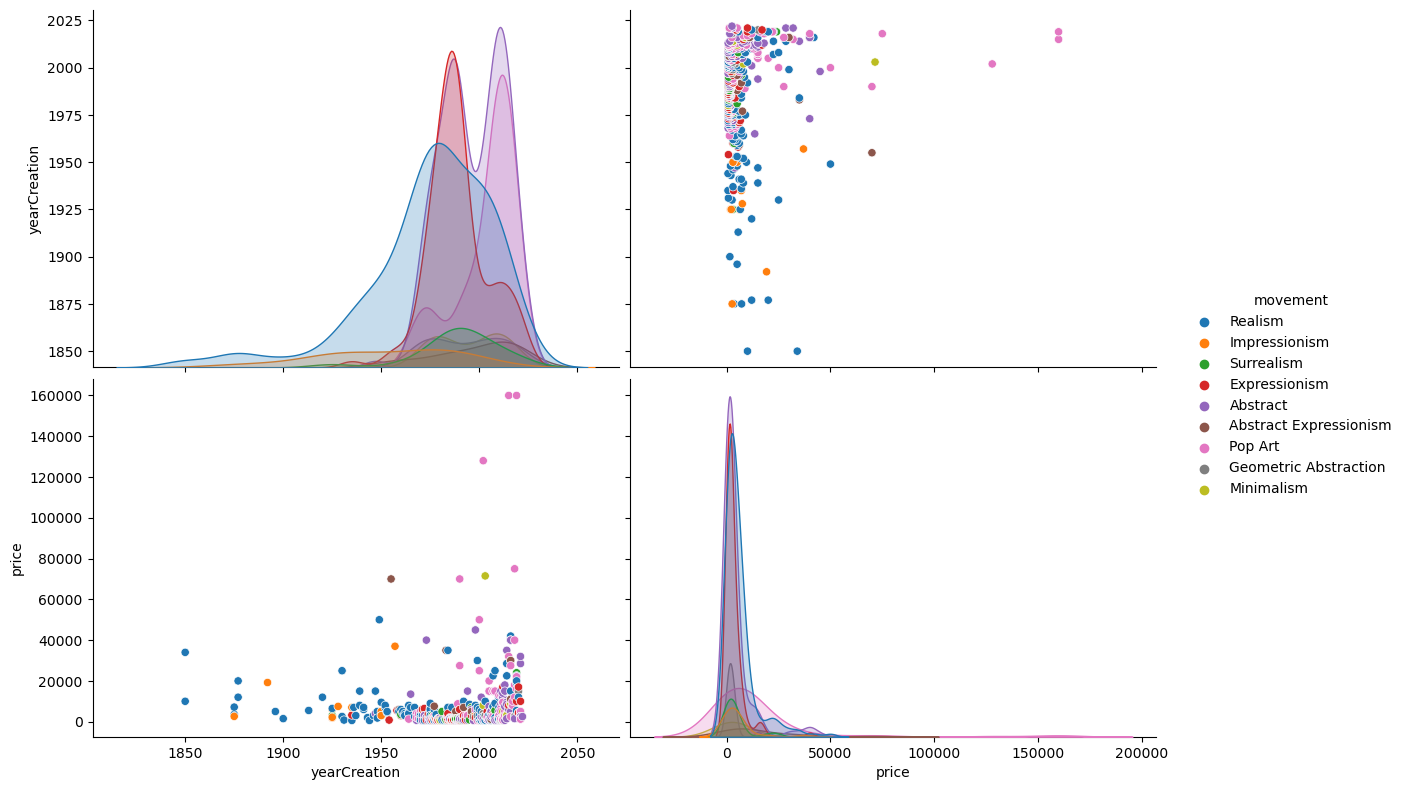

In [6]:
# Convert price from string to numeric
artwork_data['price'] = pd.to_numeric(artwork_data['price'])

sns.pairplot(data = df_artwork_data_filtered[::], vars=['yearCreation','price'], height=4, aspect=1.5, hue='movement')


## Configuring Device


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from scipy.interpolate import make_interp_spline


In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Data Preprocessing

I'll be preprocessing them based on the following art movements:
*<br>Realism*
*<br>Abstract*
*<br>Expressionism*
*<br>Pop Art*
*<br>Conceptual*
*<br>Surrealism*
*<br>Impressionism*
*<br>Geometric Abstraction*
*<br>Minimalism*
*<br>Abstract Expressionism*

In [9]:
artwork_data

,price,artist,title,yearCreation,signed,condition,period,movement,Date
25,34000,Adolf Schreyer,Arab Chief,1850,Signed Ad. Schreyer (lower left),The canvas is not lined.Fine craquelure in the...,19th Century,Realism,1850-01-01
134,10000,Felix Schlesinger,Untitled,1850,Signed in upper left recto,Not examined out of frame.Rubbing of frame cau...,19th Century,Realism,1850-01-01
306,3600,Ferdinand Bassot,Pretty in Pink,1875,Signed F Bassot lower right,The canvas is relined. Very fine pigment separ...,19th Century,Realism,1875-01-01
119,12000,Amedeo Simonetti,The Harem's Cobbler,1875,Signed Amedeo Simonetti and inscribed Roma (lo...,"Watercolor and gouache on card, hinged to a ba...",19th Century,Traditional,1875-01-01
184,7150,Edward Moran,Boy and His Boat,1875,Signed lower left recto,Not examined out of frame.Some cracking to pai...,19th Century,Realism,1875-01-01
...,...,...,...,...,...,...,...,...,...
28,32000,Agnieszka Pilat,B70 Multiples,2021,Stamped Pilat lower right verso,Overall excellent condition,Contemporary,Abstract,2021-01-01
557,1250,Devin Troy Strother,Grateful Dead Afro Cat Show,2021,Signed and numbered recto,Excellent condition.,Contemporary,Pop Art,2021-01-01
149,9500,Paige Neuhauser,Great Jones #2 from Great Jones Alley Series,2021,Signed on verso,This work is in excellent condition.,Contemporary,Photorealism,2021-01-01
558,1250,Devin Troy Strother,Grateful Dead Afro Cat Show,2021,Signed and numbered recto,Excellent condition.,Contemporary,Pop Art,2021-01-01


## Realism

In [10]:
price_realism = artwork_data[artwork_data['movement'].isin([
    'Realism'])]

data_realism = pd.DataFrame({'yearCreation': price_realism['yearCreation'].values , 'price': price_realism['price'].values})

data_realism.sort_values('yearCreation', ascending=True, inplace=True)
print(data_realism)

     yearCreation  price
0            1850  34000
1            1850  10000
2            1875   3600
3            1875   7150
4            1877  20000
..            ...    ...
163          2019  22500
164          2019  20000
161          2019   5500
162          2019  19000
165          2020  12000

[166 rows x 2 columns]


In [11]:
#find the average price for all realism artwork sold
average_price = price_realism['price'].mean()

average_price


5895.813253012048

In [12]:
X_train = torch.tensor(data_realism['yearCreation'].values.reshape(-1, 1), dtype=torch.float32).to(device)
y_train = torch.tensor(data_realism['price'].values.reshape(-1, 1), dtype=torch.float32).to(device)

In [13]:
# Create a pytorch dataset and dataloader
train_dataset_realism = TensorDataset(X_train, y_train)
train_dataloader_realism = DataLoader(train_dataset_realism, batch_size=256, shuffle=True)

In [14]:
#Model Architecture
class PricePredictor(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(PricePredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
        self.leakyrelu = nn.LeakyReLU()

    def forward(self, x):
        x = self.leakyrelu(self.fc1(x))
        x = self.leakyrelu(self.fc2(x))
        x = self.fc3(x)
        return x




In [15]:
#Model training

model = PricePredictor(input_size=1, hidden_size=128).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

# Train the model
train_losses = []
best_loss = float('inf')
patience = 0

for epoch in range(100):
    model.train()
    train_loss = 0.0
    
    for i, (inputs, labels) in enumerate(train_dataloader_realism):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = nn.MSELoss()(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_dataloader_realism.dataset)
    train_losses.append(train_loss)
    
    print('Epoch: {}, Training Loss: {:.4f}'.format(epoch+1, train_loss))
    scheduler.step(train_loss)
    
    if train_loss < best_loss:
        best_loss = train_loss
        patience = 0
    else:
        patience += 1
        # I have it set to 5 so if the train loss doesn't improve we'll use the last value here.
        if patience >= 5:
            print('Early stopping')
            break


Epoch: 1, Training Loss: 102150320.0000
Epoch: 2, Training Loss: 99870416.0000
Epoch: 3, Training Loss: 97697248.0000
Epoch: 4, Training Loss: 95512032.0000
Epoch: 5, Training Loss: 93438984.0000
Epoch: 6, Training Loss: 91360352.0000
Epoch: 7, Training Loss: 89305360.0000
Epoch: 8, Training Loss: 87308792.0000
Epoch: 9, Training Loss: 85410720.0000
Epoch: 10, Training Loss: 83567608.0000
Epoch: 11, Training Loss: 81731248.0000
Epoch: 12, Training Loss: 79945360.0000
Epoch: 13, Training Loss: 78189592.0000
Epoch: 14, Training Loss: 76481792.0000
Epoch: 15, Training Loss: 74818760.0000
Epoch: 16, Training Loss: 73212912.0000
Epoch: 17, Training Loss: 71675808.0000
Epoch: 18, Training Loss: 70224864.0000
Epoch: 19, Training Loss: 68882256.0000
Epoch: 20, Training Loss: 67669920.0000
Epoch: 21, Training Loss: 66590604.0000
Epoch: 22, Training Loss: 65647244.0000
Epoch: 23, Training Loss: 64850600.0000
Epoch: 24, Training Loss: 64208428.0000
Epoch: 25, Training Loss: 63724544.0000
Epoch: 2

In [16]:
print(data_realism)


     yearCreation  price
0            1850  34000
1            1850  10000
2            1875   3600
3            1875   7150
4            1877  20000
..            ...    ...
163          2019  22500
164          2019  20000
161          2019   5500
162          2019  19000
165          2020  12000

[166 rows x 2 columns]


In [17]:
future_years = 50
predictions = []

# Calculate the historical prices based on the model and previous values
historical_prices = data_realism['price'].values.tolist()

print(historical_prices)
print(len(historical_prices))

[34000, 10000, 3600, 7150, 20000, 12000, 5000, 1500, 5500, 12000, 6500, 25000, 2550, 800, 600, 7000, 3000, 8000, 15000, 7000, 6000, 2000, 600, 3000, 15000, 5000, 1800, 50000, 3000, 9500, 8000, 7000, 4500, 5000, 5000, 6000, 4000, 5000, 4000, 3000, 8000, 4000, 4500, 4000, 7000, 2500, 7000, 3000, 3000, 1500, 800, 800, 2995, 3000, 4000, 3995, 800, 680, 5995, 800, 2500, 3000, 5995, 2500, 700, 2500, 9000, 5000, 7000, 1200, 5000, 6000, 5000, 800, 700, 900, 5000, 1200, 3000, 800, 800, 800, 5995, 3495, 800, 1275, 1500, 800, 1500, 800, 680, 680, 1500, 7000, 35000, 800, 6000, 1295, 1500, 680, 800, 800, 1595, 7000, 800, 1500, 800, 800, 1500, 800, 680, 800, 1500, 10000, 1500, 8500, 8000, 6995, 30000, 6000, 1000, 6000, 3000, 680, 5000, 680, 800, 680, 680, 800, 800, 2500, 800, 700, 9995, 3000, 2500, 1500, 3495, 1000, 3995, 3995, 800, 800, 7500, 7500, 22500, 7500, 680, 25000, 8995, 2000, 12000, 7000, 1200, 800, 800, 22500, 28500, 15000, 42000, 22500, 20000, 5500, 19000, 12000]
166


In [18]:
# List to store the predicted prices
predicted_prices_realism = []
yearCreation_realism = data_realism['yearCreation'].to_numpy()

with torch.no_grad():
    for _ in range(future_years):
        last_year = yearCreation_realism[-1]
        next_year = last_year + 1

        # Calculate the predicted price based on the historical average and the previous value
        predicted_price = (historical_prices[-1] + average_price) / 2

        # Add random noise to the predicted price based on historical average and previous value
        noise = np.random.normal(0, average_price / 3) 
        predicted_price += noise

        # Append the predicted price to the list
        historical_prices.append(predicted_price)
        predicted_prices_realism.append(predicted_price)
        
        #append one more year to the yearCreation List
        next_year = np.asarray(next_year)
        yearCreation_realism = np.append(yearCreation_realism, next_year)
        
        # Update the input with the predicted price for the next iteration
        data_realism = pd.DataFrame({'yearCreation': yearCreation_realism, 'price': historical_prices})
        X_train = torch.tensor(data_realism['yearCreation'].values.reshape(-1, 1), dtype=torch.float32).to(device)
        y_train = torch.tensor(data_realism['price'].values.reshape(-1, 1), dtype=torch.float32).to(device)
        train_dataset_realism = TensorDataset(X_train, y_train)
        train_dataloader_realism = DataLoader(train_dataset_realism, batch_size=256, shuffle=True)
        
# Calculate the average of the predicted prices
average_predicted_price = np.mean(predicted_prices_realism)

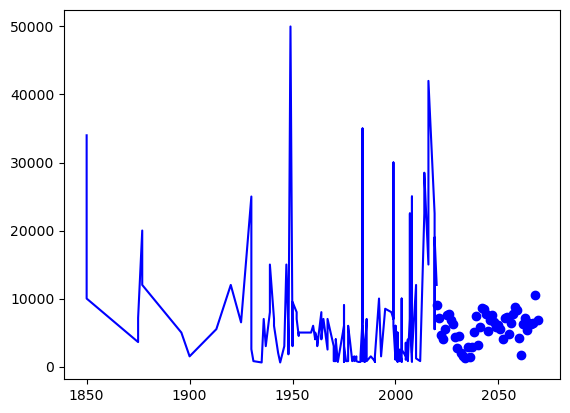

In [19]:
# Plot the historical prices as a line
plt.plot(data_realism['yearCreation'][:-future_years], data_realism['price'][:-future_years], label='Historical Prices', color='blue')

# Plot the predicted prices as dots
plt.scatter(range(last_year - future_years + 1, last_year + 1), predicted_prices_realism , label='Predicted Prices', marker='o', color='blue')

# Calculate the average line
#average_line = np.array(predicted_prices_realism)

# Calculate the average distance between the predicted points
#distances = np.diff(predicted_prices_realism)
#average_distance = np.mean(np.abs(distances))

# Calculate the window size for the moving average
#window_size = int(np.ceil(average_distance))

# Calculate the moving average of the predicted prices
#average_line = np.convolve(average_line, np.ones(window_size)/window_size, mode='valid')

# Calculate the range of years to plot the average line
#start_year = last_year - future_years + 1 + window_size//2
#end_year = start_year + len(average_line) - 1

## Abstract

In [20]:
price_abstract = artwork_data[artwork_data['movement'].isin([
    'Abstract'])]

data_abstract = pd.DataFrame({'yearCreation': price_abstract['yearCreation'].values , 'price': price_abstract['price'].values})

data_abstract.sort_values('yearCreation', ascending=True, inplace=True)
print(data_abstract)

     yearCreation  price
0            1947   4000
1            1965  13500
2            1968    680
3            1971   1275
4            1971    680
..            ...    ...
148          2021   2500
149          2021   2500
150          2021   2500
151          2021  32000
152          2022   2500

[153 rows x 2 columns]


In [21]:
average_price = price_abstract['price'].mean()

average_price


4307.156862745098

In [22]:
X_train = torch.tensor(data_abstract['yearCreation'].values.reshape(-1, 1), dtype=torch.float32).to(device)
y_train = torch.tensor(data_abstract['price'].values.reshape(-1, 1), dtype=torch.float32).to(device)

In [23]:
# Create a pytorch dataset and dataloader
train_dataset_abstract = TensorDataset(X_train, y_train)
train_dataloader_abstract = DataLoader(train_dataset_abstract, batch_size=256, shuffle=True)

In [24]:
#Model Architecture
class PricePredictor(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(PricePredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
        self.leakyrelu = nn.LeakyReLU()

    def forward(self, x):
        x = self.leakyrelu(self.fc1(x))
        x = self.leakyrelu(self.fc2(x))
        x = self.fc3(x)
        return x




In [25]:
#Model training

model = PricePredictor(input_size=1, hidden_size=128).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

# Train the model
train_losses = []
best_loss = float('inf')
patience = 0

for epoch in range(100):
    model.train()
    train_loss = 0.0
    
    for i, (inputs, labels) in enumerate(train_dataloader_realism):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = nn.MSELoss()(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_dataloader_abstract.dataset)
    train_losses.append(train_loss)
    
    print('Epoch: {}, Training Loss: {:.4f}'.format(epoch+1, train_loss))
    scheduler.step(train_loss)
    
    if train_loss < best_loss:
        best_loss = train_loss
        patience = 0
    else:
        patience += 1
        # I have it set to 5 so if the train loss doesn't improve we'll use the last value here.
        if patience >= 5:
            print('Early stopping')
            break


Epoch: 1, Training Loss: 117760003.7647
Epoch: 2, Training Loss: 114399190.5882
Epoch: 3, Training Loss: 111042669.1765
Epoch: 4, Training Loss: 107862731.2941
Epoch: 5, Training Loss: 104751122.8235
Epoch: 6, Training Loss: 101697667.7647
Epoch: 7, Training Loss: 98757808.9412
Epoch: 8, Training Loss: 95902543.0588
Epoch: 9, Training Loss: 93136399.0588
Epoch: 10, Training Loss: 90517790.1176
Epoch: 11, Training Loss: 88019333.6471
Epoch: 12, Training Loss: 85665537.8824
Epoch: 13, Training Loss: 83444126.1176
Epoch: 14, Training Loss: 81321266.8235
Epoch: 15, Training Loss: 79345869.1765
Epoch: 16, Training Loss: 77520847.0588
Epoch: 17, Training Loss: 75850791.5294
Epoch: 18, Training Loss: 74369432.4706
Epoch: 19, Training Loss: 73093118.1176
Epoch: 20, Training Loss: 72037744.9412
Epoch: 21, Training Loss: 71209581.1765
Epoch: 22, Training Loss: 70615934.1176
Epoch: 23, Training Loss: 70253364.7059
Epoch: 24, Training Loss: 70106145.8824
Epoch: 25, Training Loss: 70145641.4118
Epo

In [26]:
print(data_abstract)


     yearCreation  price
0            1947   4000
1            1965  13500
2            1968    680
3            1971   1275
4            1971    680
..            ...    ...
148          2021   2500
149          2021   2500
150          2021   2500
151          2021  32000
152          2022   2500

[153 rows x 2 columns]


In [27]:
future_years = 50
predictions = []

# Calculate the historical prices based on the model and previous values
historical_prices = data_abstract['price'].values.tolist()


In [28]:
# List to store the predicted prices
predicted_prices_abstract = []
yearCreation_abstract = data_abstract['yearCreation'].to_numpy()

with torch.no_grad():
    for _ in range(future_years):
        last_year = yearCreation_abstract[-1]
        next_year = last_year + 1

        # Calculate the predicted price based on the historical average and the previous value
        predicted_price = (historical_prices[-1] + average_price) / 2

        # Add random noise to the predicted price based on historical average and previous value
        noise = np.random.normal(0, average_price / 3) 
        predicted_price += noise

        # Append the predicted price to the list
        historical_prices.append(predicted_price)
        predicted_prices_abstract.append(predicted_price)
        
        #append one more year to the yearCreation List
        next_year = np.asarray(next_year)
        yearCreation_abstract = np.append(yearCreation_abstract, next_year)
        
        
        # Update the input with the predicted price for the next iteration
        data_abstract = pd.DataFrame({'yearCreation': yearCreation_abstract, 'price': historical_prices})
        X_train = torch.tensor(data_abstract['yearCreation'].values.reshape(-1, 1), dtype=torch.float32).to(device)
        y_train = torch.tensor(data_abstract['price'].values.reshape(-1, 1), dtype=torch.float32).to(device)
        train_dataset_abstract = TensorDataset(X_train, y_train)
        train_dataloader_abstract = DataLoader(train_dataset_abstract, batch_size=256, shuffle=True)
        
# Calculate the average of the predicted prices
average_predicted_price_abstract = np.mean(predicted_prices_abstract)

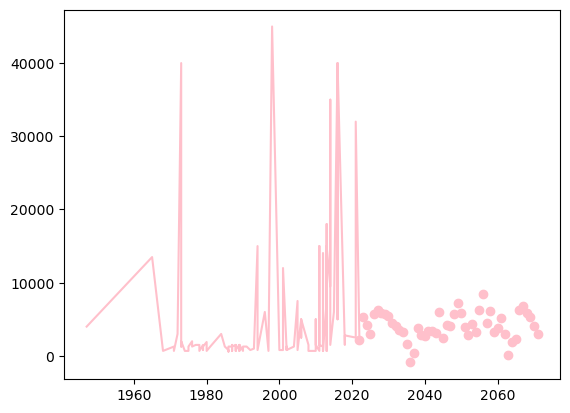

In [29]:
# Plot the historical prices as a line
plt.plot(data_abstract['yearCreation'][:-future_years], data_abstract['price'][:-future_years], label='Historical Prices', color='pink')

# Plot the predicted prices as dots
plt.scatter(range(last_year - future_years + 1, last_year + 1), predicted_prices_abstract, label='Predicted Prices', marker='o', color='pink')

# Calculate the average line
#average_line = np.array(predicted_prices)

# Calculate the average distance between the predicted points
#distances = np.diff(predicted_prices)
#average_distance = np.mean(np.abs(distances))

# Calculate the window size for the moving average
#window_size = int(np.ceil(average_distance))

# Calculate the moving average of the predicted prices
#average_line = np.convolve(average_line, np.ones(window_size)/window_size, mode='valid')

# Calculate the range of years to plot the average line
#start_year = last_year - future_years + 1 + window_size//2
#end_year = start_year + len(average_line) - 1

## Expressionism

In [30]:
price_expressionism = artwork_data[artwork_data['movement'].isin([
    'Expressionism'])]

data_expressionism = pd.DataFrame({'yearCreation': price_expressionism['yearCreation'].values , 'price': price_expressionism['price'].values})

data_expressionism.sort_values('yearCreation', ascending=True, inplace=True)
print(data_expressionism)

    yearCreation  price
0           1935   3250
1           1954    800
2           1958   5500
3           1960   3000
4           1971   6000
..           ...    ...
97          2020  17000
98          2020   4375
95          2020   4375
96          2020   4375
99          2021  10000

[100 rows x 2 columns]


In [31]:
average_price = price_expressionism['price'].mean()

average_price


3118.3

In [32]:
X_train = torch.tensor(data_expressionism['yearCreation'].values.reshape(-1, 1), dtype=torch.float32).to(device)
y_train = torch.tensor(data_expressionism['price'].values.reshape(-1, 1), dtype=torch.float32).to(device)

In [33]:
# Create a pytorch dataset and dataloader
train_dataset_expressionism = TensorDataset(X_train, y_train)
train_dataloader_expressionism = DataLoader(train_dataset_expressionism, batch_size=256, shuffle=True)

In [34]:
#Model Architecture
class PricePredictor(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(PricePredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
        self.leakyrelu = nn.LeakyReLU()

    def forward(self, x):
        x = self.leakyrelu(self.fc1(x))
        x = self.leakyrelu(self.fc2(x))
        x = self.fc3(x)
        return x




In [35]:
#Model training

model = PricePredictor(input_size=1, hidden_size=128).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

# Train the model
train_losses = []
best_loss = float('inf')
patience = 0

for epoch in range(100):
    model.train()
    train_loss = 0.0
    
    for i, (inputs, labels) in enumerate(train_dataloader_realism):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = nn.MSELoss()(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_dataloader_abstract.dataset)
    train_losses.append(train_loss)
    
    print('Epoch: {}, Training Loss: {:.4f}'.format(epoch+1, train_loss))
    scheduler.step(train_loss)
    
    if train_loss < best_loss:
        best_loss = train_loss
        patience = 0
    else:
        patience += 1
        # I have it set to 5 so if the train loss doesn't improve we'll use the last value here.
        if patience >= 5:
            print('Early stopping')
            break


Epoch: 1, Training Loss: 91358159.7635
Epoch: 2, Training Loss: 88527159.4877
Epoch: 3, Training Loss: 85862549.4384
Epoch: 4, Training Loss: 83401902.9754
Epoch: 5, Training Loss: 80981664.4729
Epoch: 6, Training Loss: 78678317.0837
Epoch: 7, Training Loss: 76442421.2808
Epoch: 8, Training Loss: 74310120.3547
Epoch: 9, Training Loss: 72204531.0739
Epoch: 10, Training Loss: 70163852.4532
Epoch: 11, Training Loss: 68155529.1429
Epoch: 12, Training Loss: 66207153.8128
Epoch: 13, Training Loss: 64337662.1084
Epoch: 14, Training Loss: 62572501.5961
Epoch: 15, Training Loss: 60950948.0985
Epoch: 16, Training Loss: 59433768.3547
Epoch: 17, Training Loss: 58040604.5320
Epoch: 18, Training Loss: 56785684.9655
Epoch: 19, Training Loss: 55695891.5468
Epoch: 20, Training Loss: 54773216.1576
Epoch: 21, Training Loss: 54028141.7143
Epoch: 22, Training Loss: 53466311.8818
Epoch: 23, Training Loss: 53087232.9458
Epoch: 24, Training Loss: 52882805.4384
Epoch: 25, Training Loss: 52836111.1330
Epoch: 26

In [36]:
print(data_expressionism)


    yearCreation  price
0           1935   3250
1           1954    800
2           1958   5500
3           1960   3000
4           1971   6000
..           ...    ...
97          2020  17000
98          2020   4375
95          2020   4375
96          2020   4375
99          2021  10000

[100 rows x 2 columns]


In [37]:
future_years = 50
predictions = []

# Calculate the historical prices based on the model and previous values
historical_prices = data_expressionism['price'].values.tolist()


In [38]:
# List to store the predicted prices
predicted_prices_expressionism = []
yearCreation_expressionism = data_expressionism['yearCreation'].to_numpy()

with torch.no_grad():
    for _ in range(future_years):
        last_year = yearCreation_expressionism[-1]
        next_year = last_year + 1

        # Calculate the predicted price based on the historical average and the previous value
        predicted_price = (historical_prices[-1] + average_price) / 2

        # Add random noise to the predicted price based on historical average and previous value
        noise = np.random.normal(0, average_price / 3) 
        predicted_price += noise

        # Append the predicted price to the list
        historical_prices.append(predicted_price)
        predicted_prices_expressionism.append(predicted_price)
        
        #append one more year to the yearCreation List
        next_year = np.asarray(next_year)
        yearCreation_expressionism = np.append(yearCreation_expressionism, next_year)
        
        
        # Update the input with the predicted price for the next iteration
        data_expressionism = pd.DataFrame({'yearCreation': yearCreation_expressionism, 'price': historical_prices})
        X_train = torch.tensor(data_expressionism['yearCreation'].values.reshape(-1, 1), dtype=torch.float32).to(device)
        y_train = torch.tensor(data_expressionism['price'].values.reshape(-1, 1), dtype=torch.float32).to(device)
        train_dataset_expressionism = TensorDataset(X_train, y_train)
        train_dataloader_expressionism = DataLoader(train_dataset_expressionism, batch_size=256, shuffle=True)
        
# Calculate the average of the predicted prices
average_predicted_price = np.mean(predicted_prices_expressionism)

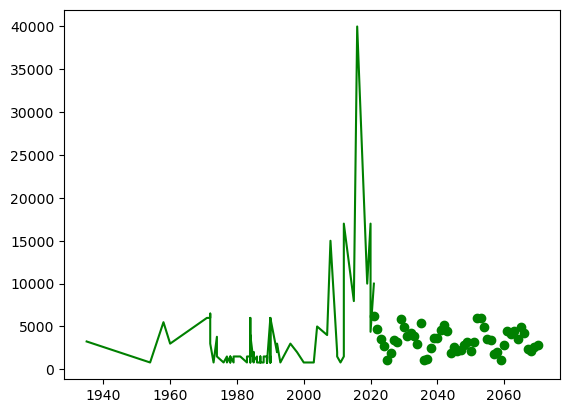

In [39]:
# Plot the historical prices as a line
plt.plot(data_expressionism['yearCreation'][:-future_years], data_expressionism['price'][:-future_years], label='Historical Prices', color='green')

# Plot the predicted prices as dots
plt.scatter(range(last_year - future_years + 1, last_year + 1), predicted_prices_expressionism, label='Predicted Prices', marker='o', color='green')

#Calculate the average line
#average_line = np.array(predicted_prices)

# Calculate the average distance between the predicted points
#distances = np.diff(predicted_prices)
#average_distance = np.mean(np.abs(distances))

# Calculate the window size for the moving average
#window_size = int(np.ceil(average_distance))

# Calculate the moving average of the predicted prices
#average_line = np.convolve(average_line, np.ones(window_size)/window_size, mode='valid')

# Calculate the range of years to plot the average line
#start_year = last_year - future_years + 1 + window_size//2
#end_year = start_year + len(average_line) - 1

## Pop Art

In [40]:
price_popart = artwork_data[artwork_data['movement'].isin([
    'Pop Art'])]

data_popart = pd.DataFrame({'yearCreation': price_popart['yearCreation'].values , 'price': price_popart['price'].values})

data_popart.sort_values('yearCreation', ascending=True, inplace=True)
print(data_popart)

    yearCreation  price
0           1964   1275
1           1968   4000
2           1968   2000
3           1969   1500
4           1969   3895
..           ...    ...
82          2019  22000
83          2019  16000
85          2021   1250
84          2021   5000
86          2021   1250

[87 rows x 2 columns]


In [41]:
average_price = price_popart['price'].mean()

average_price


14485.632183908046

In [42]:
X_train = torch.tensor(data_popart['yearCreation'].values.reshape(-1, 1), dtype=torch.float32).to(device)
y_train = torch.tensor(data_popart['price'].values.reshape(-1, 1), dtype=torch.float32).to(device)

In [43]:
# Create a pytorch dataset and dataloader
train_dataset_popart = TensorDataset(X_train, y_train)
train_dataloader_popart = DataLoader(train_dataset_popart, batch_size=256, shuffle=True)

In [44]:
#Model Architecture
class PricePredictor(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(PricePredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
        self.leakyrelu = nn.LeakyReLU()

    def forward(self, x):
        x = self.leakyrelu(self.fc1(x))
        x = self.leakyrelu(self.fc2(x))
        x = self.fc3(x)
        return x




In [45]:
#Model training

model = PricePredictor(input_size=1, hidden_size=128).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

# Train the model
train_losses = []
best_loss = float('inf')
patience = 0

for epoch in range(100):
    model.train()
    train_loss = 0.0
    
    for i, (inputs, labels) in enumerate(train_dataloader_realism):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = nn.MSELoss()(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_dataloader_abstract.dataset)
    train_losses.append(train_loss)
    
    print('Epoch: {}, Training Loss: {:.4f}'.format(epoch+1, train_loss))
    scheduler.step(train_loss)
    
    if train_loss < best_loss:
        best_loss = train_loss
        patience = 0
    else:
        patience += 1
        # I have it set to 5 so if the train loss doesn't improve we'll use the last value here.
        if patience >= 5:
            print('Early stopping')
            break


Epoch: 1, Training Loss: 93296609.7340
Epoch: 2, Training Loss: 90426333.6355
Epoch: 3, Training Loss: 87776671.2118
Epoch: 4, Training Loss: 85388685.8719
Epoch: 5, Training Loss: 83103776.1576
Epoch: 6, Training Loss: 80884147.3892
Epoch: 7, Training Loss: 78709055.0542
Epoch: 8, Training Loss: 76600367.2906
Epoch: 9, Training Loss: 74557317.9901
Epoch: 10, Training Loss: 72609725.7931
Epoch: 11, Training Loss: 70685316.8867
Epoch: 12, Training Loss: 68786210.8374
Epoch: 13, Training Loss: 66935450.4828
Epoch: 14, Training Loss: 65120910.0296
Epoch: 15, Training Loss: 63361405.9507
Epoch: 16, Training Loss: 61678848.9458
Epoch: 17, Training Loss: 60093851.5862
Epoch: 18, Training Loss: 58626158.1872
Epoch: 19, Training Loss: 57295666.2857
Epoch: 20, Training Loss: 56120570.9557
Epoch: 21, Training Loss: 55112980.9655
Epoch: 22, Training Loss: 54285243.4286
Epoch: 23, Training Loss: 53647283.7044
Epoch: 24, Training Loss: 53199250.7586
Epoch: 25, Training Loss: 52933245.1626
Epoch: 26

In [46]:
print(data_popart)


    yearCreation  price
0           1964   1275
1           1968   4000
2           1968   2000
3           1969   1500
4           1969   3895
..           ...    ...
82          2019  22000
83          2019  16000
85          2021   1250
84          2021   5000
86          2021   1250

[87 rows x 2 columns]


In [47]:
future_years = 50
predictions = []

# Calculate the historical prices based on the model and previous values
historical_prices = data_popart['price'].values.tolist()


In [48]:
# List to store the predicted prices
predicted_prices_popart = []
yearCreation_popart = data_popart['yearCreation'].to_numpy()

with torch.no_grad():
    for _ in range(future_years):
        last_year = yearCreation_popart[-1]
        next_year = last_year + 1

        # Calculate the predicted price based on the historical average and the previous value
        predicted_price = (historical_prices[-1] + average_price) / 2

        # Add random noise to the predicted price based on historical average and previous value
        noise = np.random.normal(0, average_price / 3) 
        predicted_price += noise

        # Append the predicted price to the list
        historical_prices.append(predicted_price)
        predicted_prices_popart.append(predicted_price)
        
        #append one more year to the yearCreation List
        next_year = np.asarray(next_year)
        yearCreation_popart = np.append(yearCreation_popart, next_year)
        
        
        # Update the input with the predicted price for the next iteration
        data_popart = pd.DataFrame({'yearCreation': yearCreation_popart, 'price': historical_prices})
        X_train = torch.tensor(data_popart['yearCreation'].values.reshape(-1, 1), dtype=torch.float32).to(device)
        y_train = torch.tensor(data_popart['price'].values.reshape(-1, 1), dtype=torch.float32).to(device)
        train_dataset_popart = TensorDataset(X_train, y_train)
        train_dataloader_popart = DataLoader(train_dataset_popart, batch_size=256, shuffle=True)
        
# Calculate the average of the predicted prices
average_predicted_price = np.mean(predicted_prices_popart)

In [49]:
print(yearCreation_popart)

[1964 1968 1968 1969 1969 1970 1975 1975 1975 1976 1977 1977 1984 1989
 1990 1990 1992 1992 1993 1994 1994 1994 1998 1999 2000 2000 2002 2004
 2004 2005 2005 2005 2005 2006 2007 2007 2007 2007 2008 2008 2008 2010
 2010 2010 2010 2010 2010 2011 2011 2011 2011 2011 2011 2012 2012 2012
 2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 2013 2013 2014 2015
 2015 2016 2016 2016 2017 2017 2018 2018 2018 2018 2019 2019 2019 2019
 2021 2021 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032
 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046
 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060
 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071]


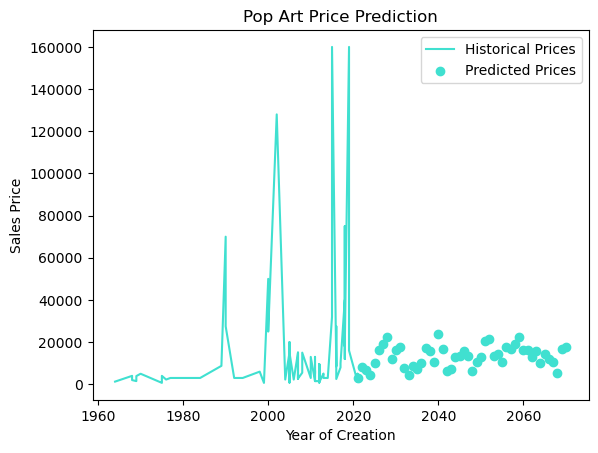

In [50]:
# Plot the historical prices as a line
plt.plot(data_popart['yearCreation'][:-future_years], data_popart['price'][:-future_years], label='Historical Prices', color='turquoise')

# Plot the predicted prices as dots
plt.scatter(range(last_year - future_years + 1, last_year + 1), predicted_prices_popart, label='Predicted Prices', marker='o', color='turquoise')

# Calculate the average line
#average_line = np.array(predicted_prices)

# Calculate the average distance between the predicted points
#distances = np.diff(predicted_prices)
#average_distance = np.mean(np.abs(distances))

# Calculate the window size for the moving average
#window_size = int(np.ceil(average_distance))

# Calculate the moving average of the predicted prices
#average_line = np.convolve(average_line, np.ones(window_size)/window_size, mode='valid')

# Calculate the range of years to plot the average line
#start_year = last_year - future_years + 1 + window_size//2
#end_year = start_year + len(average_line) - 1

plt.xlabel('Year of Creation')
plt.ylabel('Sales Price')
plt.title('Pop Art Price Prediction')
plt.legend()
plt.show()

## Final Prediction Graph (ft. Top Four Art Movements in Sales Volume)

I decided to only plot the top 4 art movements into one main graph as any more would have made the graph too busy, and thus decreasing its quality of use. 

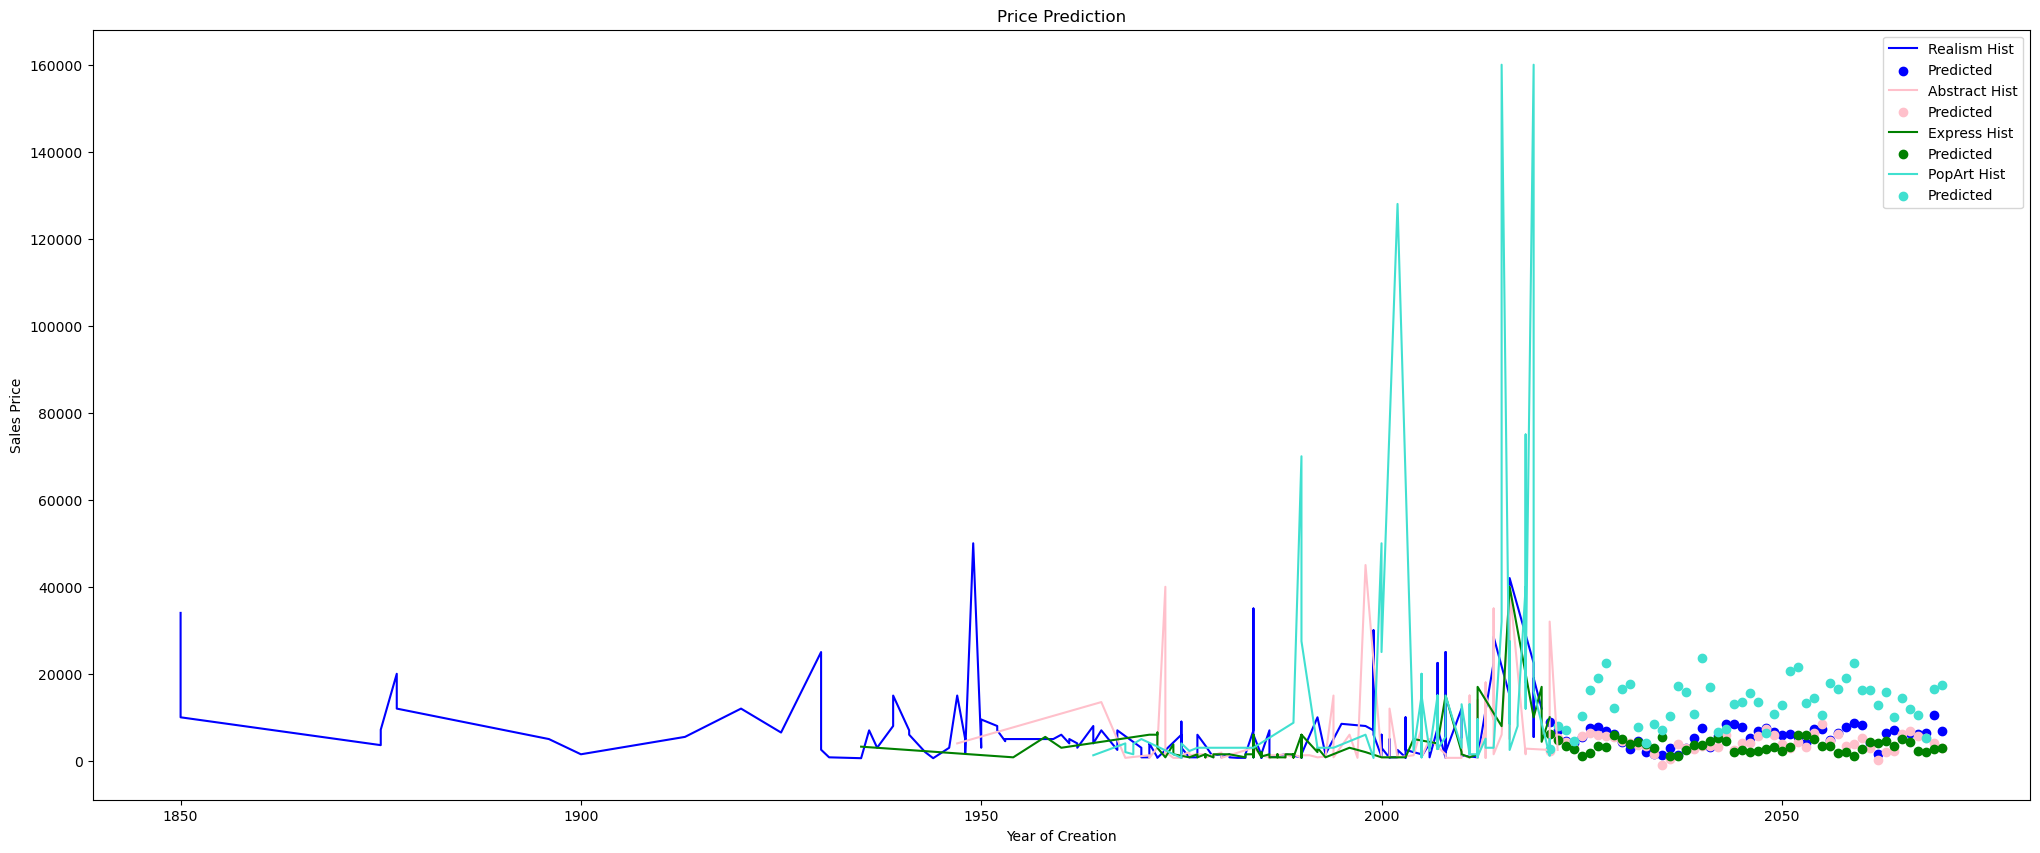

In [51]:

plt.figure(figsize=(25,10))


#Realism
plt.plot(data_realism['yearCreation'][:-future_years], data_realism['price'][:-future_years], label='Realism Hist', color='blue')
plt.scatter(range(last_year - future_years + 1, last_year + 1), predicted_prices_realism , label='Predicted', marker='o', color='blue')

#Abstract
plt.plot(data_abstract['yearCreation'][:-future_years], data_abstract['price'][:-future_years], label='Abstract Hist', color='pink')
plt.scatter(range(last_year - future_years + 1, last_year + 1), predicted_prices_abstract, label='Predicted', marker='o', color='pink')

#Expressionism
plt.plot(data_expressionism['yearCreation'][:-future_years], data_expressionism['price'][:-future_years], label='Express Hist', color='green')
plt.scatter(range(last_year - future_years + 1, last_year + 1), predicted_prices_expressionism, label='Predicted', marker='o', color='green')

#PopArt
plt.plot(data_popart['yearCreation'][:-future_years], data_popart['price'][:-future_years], label='PopArt Hist', color='turquoise')
plt.scatter(range(last_year - future_years + 1, last_year + 1), predicted_prices_popart, label='Predicted', marker='o', color='turquoise')


plt.xlabel('Year of Creation')
plt.ylabel('Sales Price')
plt.title('Price Prediction')
plt.legend()
plt.show()

## Plotting More Art Movements

Although the following art movements are not reflected in my final graph, they remain pertinent to this research project as the prediction for each individual movement holds value regardless of sales volume.

## Surrealism

In [52]:
price_surrealism = artwork_data[artwork_data['movement'].isin([
    'Surrealism'])]

data_surrealism = pd.DataFrame({'yearCreation': price_surrealism['yearCreation'].values , 'price': price_surrealism['price'].values})

data_surrealism.sort_values('yearCreation', ascending=True, inplace=True)
print(data_surrealism)

    yearCreation  price
0           1925   3000
1           1960   3500
2           1976   1500
3           1976   3000
4           1981   5000
5           1983    995
6           1987    800
7           1988   1500
8           1988   1275
10          1989   1500
9           1989   1500
11          1991    800
12          1995    900
13          1996   7000
14          2001    800
15          2001    800
16          2008   5500
17          2008    800
18          2019  20000
19          2019  24000


In [53]:
average_price = price_surrealism['price'].mean()

average_price


4208.5

In [54]:
X_train = torch.tensor(data_surrealism['yearCreation'].values.reshape(-1, 1), dtype=torch.float32).to(device)
y_train = torch.tensor(data_surrealism['price'].values.reshape(-1, 1), dtype=torch.float32).to(device)

In [55]:
# Create a pytorch dataset and dataloader
train_dataset_surrealism = TensorDataset(X_train, y_train)
train_dataloader_surrealism = DataLoader(train_dataset_surrealism, batch_size=256, shuffle=True)

In [56]:
#Model Architecture
class PricePredictor(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(PricePredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
        self.leakyrelu = nn.LeakyReLU()

    def forward(self, x):
        x = self.leakyrelu(self.fc1(x))
        x = self.leakyrelu(self.fc2(x))
        x = self.fc3(x)
        return x




In [57]:
#Model training

model = PricePredictor(input_size=1, hidden_size=128).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

# Train the model
train_losses = []
best_loss = float('inf')
patience = 0

for epoch in range(100):
    model.train()
    train_loss = 0.0
    
    for i, (inputs, labels) in enumerate(train_dataloader_realism):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = nn.MSELoss()(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_dataloader_abstract.dataset)
    train_losses.append(train_loss)
    
    print('Epoch: {}, Training Loss: {:.4f}'.format(epoch+1, train_loss))
    scheduler.step(train_loss)
    
    if train_loss < best_loss:
        best_loss = train_loss
        patience = 0
    else:
        patience += 1
        # I have it set to 5 so if the train loss doesn't improve we'll use the last value here.
        if patience >= 5:
            print('Early stopping')
            break


Epoch: 1, Training Loss: 89742837.2808
Epoch: 2, Training Loss: 86911130.4828
Epoch: 3, Training Loss: 84163882.8768
Epoch: 4, Training Loss: 81522060.2956
Epoch: 5, Training Loss: 78959717.2020
Epoch: 6, Training Loss: 76534064.8670
Epoch: 7, Training Loss: 74242379.3498
Epoch: 8, Training Loss: 72123383.1724
Epoch: 9, Training Loss: 70082755.6256
Epoch: 10, Training Loss: 68091116.4532
Epoch: 11, Training Loss: 66186332.6897
Epoch: 12, Training Loss: 64380653.5567
Epoch: 13, Training Loss: 62655113.6158
Epoch: 14, Training Loss: 61024226.3645
Epoch: 15, Training Loss: 59505752.7488
Epoch: 16, Training Loss: 58112448.4729
Epoch: 17, Training Loss: 56860729.5369
Epoch: 18, Training Loss: 55765028.5714
Epoch: 19, Training Loss: 54830704.0788
Epoch: 20, Training Loss: 54074801.9704
Epoch: 21, Training Loss: 53501472.0000
Epoch: 22, Training Loss: 53110416.2365
Epoch: 23, Training Loss: 52893620.3350
Epoch: 24, Training Loss: 52834455.4877
Epoch: 25, Training Loss: 52907040.0000
Epoch: 26

In [58]:
print(data_surrealism)

    yearCreation  price
0           1925   3000
1           1960   3500
2           1976   1500
3           1976   3000
4           1981   5000
5           1983    995
6           1987    800
7           1988   1500
8           1988   1275
10          1989   1500
9           1989   1500
11          1991    800
12          1995    900
13          1996   7000
14          2001    800
15          2001    800
16          2008   5500
17          2008    800
18          2019  20000
19          2019  24000


In [59]:
future_years = 50
predictions = []

# Calculate the historical prices based on the model and previous values
historical_prices = data_surrealism['price'].values.tolist()

print(historical_prices)
print(len(historical_prices))

[3000, 3500, 1500, 3000, 5000, 995, 800, 1500, 1275, 1500, 1500, 800, 900, 7000, 800, 800, 5500, 800, 20000, 24000]
20


In [60]:
# List to store the predicted prices
predicted_prices = []
yearCreation_surrealism = data_surrealism['yearCreation'].to_numpy()

with torch.no_grad():
    for _ in range(future_years):
        last_year = yearCreation_surrealism[-1]
        next_year = last_year + 1

        # Calculate the predicted price based on the historical average and the previous value
        predicted_price = (historical_prices[-1] + average_price) / 2

        # Add random noise to the predicted price based on historical average and previous value
        noise = np.random.normal(0, average_price / 3) 
        predicted_price += noise

        # Append the predicted price to the list
        historical_prices.append(predicted_price)
        predicted_prices.append(predicted_price)
        
        #append one more year to the yearCreation List
        next_year = np.asarray(next_year)
        yearCreation_surrealism = np.append(yearCreation_surrealism, next_year)
        
        
        # Update the input with the predicted price for the next iteration
        data = pd.DataFrame({'yearCreation': yearCreation_surrealism, 'price': historical_prices})
        X_train = torch.tensor(data['yearCreation'].values.reshape(-1, 1), dtype=torch.float32).to(device)
        y_train = torch.tensor(data['price'].values.reshape(-1, 1), dtype=torch.float32).to(device)
        train_dataset_surrealism = TensorDataset(X_train, y_train)
        train_dataloader_surrealism = DataLoader(train_dataset_surrealism, batch_size=256, shuffle=True)
        
# Calculate the average of the predicted prices
average_predicted_price = np.mean(predicted_prices)

In [61]:
print(yearCreation_surrealism)

[1925 1960 1976 1976 1981 1983 1987 1988 1988 1989 1989 1991 1995 1996
 2001 2001 2008 2008 2019 2019 2020 2021 2022 2023 2024 2025 2026 2027
 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041
 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055
 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069]


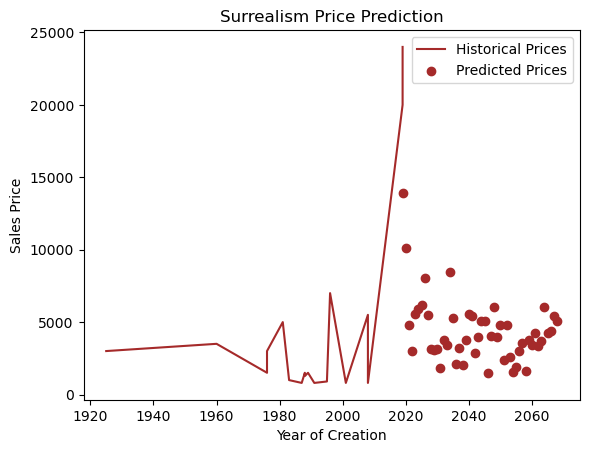

In [62]:
# Plot the historical prices as a line
plt.plot(data['yearCreation'][:-future_years], data['price'][:-future_years], label='Historical Prices', color='brown')

# Plot the predicted prices as dots
plt.scatter(range(last_year - future_years + 1, last_year + 1), predicted_prices, label='Predicted Prices', marker='o', color='brown')

# Calculate the average line
average_line = np.array(predicted_prices)

# Calculate the average distance between the predicted points
distances = np.diff(predicted_prices)
average_distance = np.mean(np.abs(distances))

# Calculate the window size for the moving average
window_size = int(np.ceil(average_distance))

# Calculate the moving average of the predicted prices
average_line = np.convolve(average_line, np.ones(window_size)/window_size, mode='valid')

# Calculate the range of years to plot the average line
start_year = last_year - future_years + 1 + window_size//2
end_year = start_year + len(average_line) - 1

plt.xlabel('Year of Creation')
plt.ylabel('Sales Price')
plt.title('Surrealism Price Prediction')
plt.legend()
plt.show()

## Impressionism

In [63]:
price_impressionism = artwork_data[artwork_data['movement'].isin([
    'Impressionism'])]

data_impressionism = pd.DataFrame({'yearCreation': price_impressionism['yearCreation'].values , 'price': price_impressionism['price'].values})

data_impressionism.sort_values('yearCreation', ascending=True, inplace=True)
print(data_impressionism)

    yearCreation  price
0           1875   2600
1           1892  19200
2           1925   1895
3           1925   6000
4           1925   1875
5           1925   2160
6           1928   7500
7           1935   7000
9           1950   3000
8           1950   5000
10          1957  37000
11          1976    800
12          1977   1500
13          1977   1500
14          1977    800
15          1978   1500
16          1984   1500
17          1989   1500
18          1998   3000
19          2001    800


In [64]:
average_price = price_impressionism['price'].mean()

average_price


5306.5

In [65]:
X_train = torch.tensor(data_impressionism['yearCreation'].values.reshape(-1, 1), dtype=torch.float32).to(device)
y_train = torch.tensor(data_impressionism['price'].values.reshape(-1, 1), dtype=torch.float32).to(device)

In [66]:
# Create a pytorch dataset and dataloader
train_dataset_impressionism = TensorDataset(X_train, y_train)
train_dataloader_impressionism = DataLoader(train_dataset_impressionism, batch_size=256, shuffle=True)

In [67]:
#Model Architecture
class PricePredictor(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(PricePredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
        self.leakyrelu = nn.LeakyReLU()

    def forward(self, x):
        x = self.leakyrelu(self.fc1(x))
        x = self.leakyrelu(self.fc2(x))
        x = self.fc3(x)
        return x




In [68]:
#Model training

model = PricePredictor(input_size=1, hidden_size=128).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

# Train the model
train_losses = []
best_loss = float('inf')
patience = 0

for epoch in range(100):
    model.train()
    train_loss = 0.0
    
    for i, (inputs, labels) in enumerate(train_dataloader_realism):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = nn.MSELoss()(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_dataloader_abstract.dataset)
    train_losses.append(train_loss)
    
    print('Epoch: {}, Training Loss: {:.4f}'.format(epoch+1, train_loss))
    scheduler.step(train_loss)
    
    if train_loss < best_loss:
        best_loss = train_loss
        patience = 0
    else:
        patience += 1
        # I have it set to 5 so if the train loss doesn't improve we'll use the last value here.
        if patience >= 5:
            print('Early stopping')
            break


Epoch: 1, Training Loss: 88872504.1182
Epoch: 2, Training Loss: 86015456.1576
Epoch: 3, Training Loss: 83386572.2956
Epoch: 4, Training Loss: 80865233.0246
Epoch: 5, Training Loss: 78367004.6897
Epoch: 6, Training Loss: 75888644.0985
Epoch: 7, Training Loss: 73536180.6502
Epoch: 8, Training Loss: 71324676.8867
Epoch: 9, Training Loss: 69144323.9409
Epoch: 10, Training Loss: 67049592.1182
Epoch: 11, Training Loss: 65046171.9015
Epoch: 12, Training Loss: 63157242.3251
Epoch: 13, Training Loss: 61375244.4532
Epoch: 14, Training Loss: 59734287.1330
Epoch: 15, Training Loss: 58239894.8571
Epoch: 16, Training Loss: 56912561.0246
Epoch: 17, Training Loss: 55751276.9261
Epoch: 18, Training Loss: 54769189.8325
Epoch: 19, Training Loss: 53984528.8670
Epoch: 20, Training Loss: 53405431.8030
Epoch: 21, Training Loss: 53032132.7291
Epoch: 22, Training Loss: 52855042.5222
Epoch: 23, Training Loss: 52852957.0049
Epoch: 24, Training Loss: 52992014.1872
Epoch: 25, Training Loss: 53226698.7192
Epoch 000

In [69]:
print(data_impressionism)


    yearCreation  price
0           1875   2600
1           1892  19200
2           1925   1895
3           1925   6000
4           1925   1875
5           1925   2160
6           1928   7500
7           1935   7000
9           1950   3000
8           1950   5000
10          1957  37000
11          1976    800
12          1977   1500
13          1977   1500
14          1977    800
15          1978   1500
16          1984   1500
17          1989   1500
18          1998   3000
19          2001    800


In [70]:
future_years = 50
predictions = []

# Calculate the historical prices based on the model and previous values
historical_prices = data_impressionism['price'].values.tolist()

print(historical_prices)
print(len(historical_prices))

[2600, 19200, 1895, 6000, 1875, 2160, 7500, 7000, 3000, 5000, 37000, 800, 1500, 1500, 800, 1500, 1500, 1500, 3000, 800]
20


In [71]:
# List to store the predicted prices
predicted_prices = []
yearCreation_impressionism = data_impressionism['yearCreation'].to_numpy()

with torch.no_grad():
    for _ in range(future_years):
        last_year = yearCreation_impressionism[-1]
        next_year = last_year + 1

        # Calculate the predicted price based on the historical average and the previous value
        predicted_price = (historical_prices[-1] + average_price) / 2

        # Add random noise to the predicted price based on historical average and previous value
        noise = np.random.normal(0, average_price / 3) 
        predicted_price += noise

        # Append the predicted price to the list
        historical_prices.append(predicted_price)
        predicted_prices.append(predicted_price)
        
        #append one more year to the yearCreation List
        next_year = np.asarray(next_year)
        yearCreation_impressionism = np.append(yearCreation_impressionism, next_year)
        
        
        # Update the input with the predicted price for the next iteration
        data = pd.DataFrame({'yearCreation': yearCreation_impressionism, 'price': historical_prices})
        X_train = torch.tensor(data['yearCreation'].values.reshape(-1, 1), dtype=torch.float32).to(device)
        y_train = torch.tensor(data['price'].values.reshape(-1, 1), dtype=torch.float32).to(device)
        train_dataset_impressionism = TensorDataset(X_train, y_train)
        train_dataloader_impressionism = DataLoader(train_dataset_impressionism, batch_size=256, shuffle=True)
        
# Calculate the average of the predicted prices
average_predicted_price = np.mean(predicted_prices)

In [72]:
print(yearCreation_impressionism)

[1875 1892 1925 1925 1925 1925 1928 1935 1950 1950 1957 1976 1977 1977
 1977 1978 1984 1989 1998 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023
 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037
 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051]


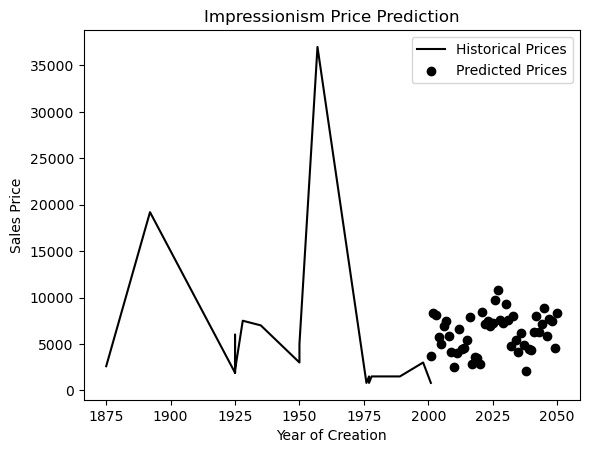

In [73]:
# Plot the historical prices as a line
plt.plot(data['yearCreation'][:-future_years], data['price'][:-future_years], label='Historical Prices', color='black')

# Plot the predicted prices as dots
plt.scatter(range(last_year - future_years + 1, last_year + 1), predicted_prices, label='Predicted Prices', marker='o', color='black')

# Calculate the average line
average_line = np.array(predicted_prices)

# Calculate the average distance between the predicted points
distances = np.diff(predicted_prices)
average_distance = np.mean(np.abs(distances))

# Calculate the window size for the moving average
window_size = int(np.ceil(average_distance))

# Calculate the moving average of the predicted prices
average_line = np.convolve(average_line, np.ones(window_size)/window_size, mode='valid')

# Calculate the range of years to plot the average line
start_year = last_year - future_years + 1 + window_size//2
end_year = start_year + len(average_line) - 1

plt.xlabel('Year of Creation')
plt.ylabel('Sales Price')
plt.title('Impressionism Price Prediction')
plt.legend()
plt.show()

## Conceptual

In [74]:
price_conceptual = artwork_data[artwork_data['movement'].isin([
    'Conceptual '])]

data_conceptual = pd.DataFrame({'yearCreation': price_conceptual['yearCreation'].values , 'price': price_conceptual['price'].values})

data_conceptual.sort_values('yearCreation', ascending=True, inplace=True)
print(data_conceptual)

    yearCreation  price
0           1950   1500
1           1952    800
2           1970  25000
3           1971   4500
4           1980   5500
..           ...    ...
66          2018  22500
68          2018  21000
70          2019   7500
69          2019   7500
71          2020   7000

[72 rows x 2 columns]


In [75]:
average_price = price_conceptual['price'].mean()

average_price


10261.111111111111

In [76]:
X_train = torch.tensor(data_conceptual['yearCreation'].values.reshape(-1, 1), dtype=torch.float32).to(device)
y_train = torch.tensor(data_conceptual['price'].values.reshape(-1, 1), dtype=torch.float32).to(device)

In [77]:
# Create a pytorch dataset and dataloader
train_dataset_conceptual = TensorDataset(X_train, y_train)
train_dataloader_conceptual = DataLoader(train_dataset_conceptual, batch_size=256, shuffle=True)

In [78]:
#Model Architecture
class PricePredictor(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(PricePredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
        self.leakyrelu = nn.LeakyReLU()

    def forward(self, x):
        x = self.leakyrelu(self.fc1(x))
        x = self.leakyrelu(self.fc2(x))
        x = self.fc3(x)
        return x




In [79]:
#Model training

model = PricePredictor(input_size=1, hidden_size=128).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

# Train the model
train_losses = []
best_loss = float('inf')
patience = 0

for epoch in range(100):
    model.train()
    train_loss = 0.0
    
    for i, (inputs, labels) in enumerate(train_dataloader_realism):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = nn.MSELoss()(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_dataloader_abstract.dataset)
    train_losses.append(train_loss)
    
    print('Epoch: {}, Training Loss: {:.4f}'.format(epoch+1, train_loss))
    scheduler.step(train_loss)
    
    if train_loss < best_loss:
        best_loss = train_loss
        patience = 0
    else:
        patience += 1
        # I have it set to 5 so if the train loss doesn't improve we'll use the last value here.
        if patience >= 5:
            print('Early stopping')
            break


Epoch: 1, Training Loss: 90093842.6010
Epoch: 2, Training Loss: 88243444.0197
Epoch: 3, Training Loss: 86449992.8276
Epoch: 4, Training Loss: 84562293.2808
Epoch: 5, Training Loss: 82650069.7537
Epoch: 6, Training Loss: 80741949.1626
Epoch: 7, Training Loss: 78852751.4483
Epoch: 8, Training Loss: 77031430.9360
Epoch: 9, Training Loss: 75233749.1232
Epoch: 10, Training Loss: 73476117.7537
Epoch: 11, Training Loss: 71726675.2315
Epoch: 12, Training Loss: 69969158.7783
Epoch: 13, Training Loss: 68226049.4187
Epoch: 14, Training Loss: 66507085.2414
Epoch: 15, Training Loss: 64827975.7241
Epoch: 16, Training Loss: 63203902.5813
Epoch: 17, Training Loss: 61629822.2660
Epoch: 18, Training Loss: 60152280.1182
Epoch: 19, Training Loss: 58776000.4729
Epoch: 20, Training Loss: 57513385.7734
Epoch: 21, Training Loss: 56380392.3547
Epoch: 22, Training Loss: 55391465.6158
Epoch: 23, Training Loss: 54557709.8719
Epoch: 24, Training Loss: 53887718.3054
Epoch: 25, Training Loss: 53385670.4631
Epoch: 26

In [80]:
print(data_conceptual)


    yearCreation  price
0           1950   1500
1           1952    800
2           1970  25000
3           1971   4500
4           1980   5500
..           ...    ...
66          2018  22500
68          2018  21000
70          2019   7500
69          2019   7500
71          2020   7000

[72 rows x 2 columns]


In [81]:
future_years = 50
predictions = []

# Calculate the historical prices based on the model and previous values
historical_prices = data_conceptual['price'].values.tolist()

print(historical_prices)
print(len(historical_prices))

[1500, 800, 25000, 4500, 5500, 1500, 800, 800, 800, 800, 800, 800, 800, 3500, 12000, 10000, 10000, 12000, 12000, 42500, 42500, 48000, 10000, 10000, 2500, 1000, 9500, 32000, 12500, 4500, 3500, 1275, 6500, 9000, 9000, 800, 20000, 20000, 14000, 2000, 2000, 18000, 15000, 3495, 9500, 30000, 1500, 6000, 14680, 23000, 10000, 3000, 800, 9350, 10000, 800, 5000, 4000, 20000, 5000, 5000, 4000, 24000, 5000, 22000, 15000, 2200, 22500, 21000, 7500, 7500, 7000]
72


In [82]:
# List to store the predicted prices
predicted_prices = []
yearCreation_conceptual = data_conceptual['yearCreation'].to_numpy()

with torch.no_grad():
    for _ in range(future_years):
        last_year = yearCreation_conceptual[-1]
        next_year = last_year + 1

        # Calculate the predicted price based on the historical average and the previous value
        predicted_price = (historical_prices[-1] + average_price) / 2

        # Add random noise to the predicted price based on historical average and previous value
        noise = np.random.normal(0, average_price / 3) 
        predicted_price += noise

        # Append the predicted price to the list
        historical_prices.append(predicted_price)
        predicted_prices.append(predicted_price)
        
        #append one more year to the yearCreation List
        next_year = np.asarray(next_year)
        yearCreation_conceptual = np.append(yearCreation_conceptual, next_year)
        
        
        # Update the input with the predicted price for the next iteration
        data = pd.DataFrame({'yearCreation': yearCreation_conceptual, 'price': historical_prices})
        X_train = torch.tensor(data['yearCreation'].values.reshape(-1, 1), dtype=torch.float32).to(device)
        y_train = torch.tensor(data['price'].values.reshape(-1, 1), dtype=torch.float32).to(device)
        train_dataset_conceptual = TensorDataset(X_train, y_train)
        train_dataloader_conceptual = DataLoader(train_dataset_conceptual, batch_size=256, shuffle=True)
        
# Calculate the average of the predicted prices
average_predicted_price = np.mean(predicted_prices)

In [83]:
print(yearCreation_conceptual)

[1950 1952 1970 1971 1980 1981 1982 1982 1982 1982 1982 1988 1988 1990
 1990 1990 1990 1990 1990 1990 1990 1991 1991 1993 1994 1997 1997 1998
 1999 2000 2000 2000 2000 2001 2001 2001 2004 2004 2005 2006 2006 2006
 2007 2008 2008 2008 2009 2009 2009 2010 2010 2010 2011 2012 2012 2012
 2013 2013 2014 2014 2014 2014 2014 2014 2015 2015 2018 2018 2018 2019
 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032
 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046
 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060
 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070]


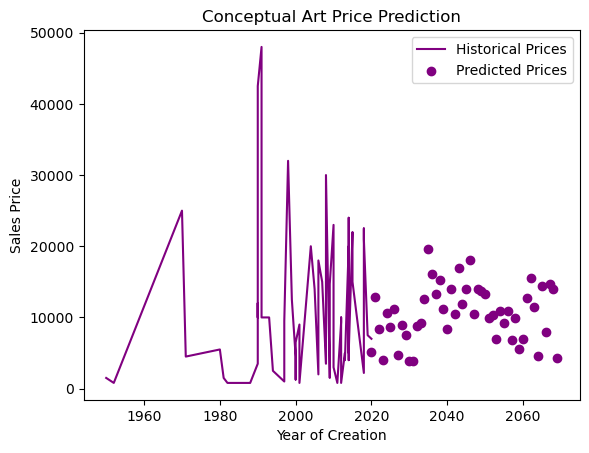

In [84]:
# Plot the historical prices as a line
plt.plot(data['yearCreation'][:-future_years], data['price'][:-future_years], label='Historical Prices', color='purple')

# Plot the predicted prices as dots
plt.scatter(range(last_year - future_years + 1, last_year + 1), predicted_prices, label='Predicted Prices', marker='o', color='purple')

# Calculate the average line
average_line = np.array(predicted_prices)

# Calculate the average distance between the predicted points
distances = np.diff(predicted_prices)
average_distance = np.mean(np.abs(distances))

# Calculate the window size for the moving average
window_size = int(np.ceil(average_distance))

# Calculate the moving average of the predicted prices
average_line = np.convolve(average_line, np.ones(window_size)/window_size, mode='valid')

# Calculate the range of years to plot the average line
start_year = last_year - future_years + 1 + window_size//2
end_year = start_year + len(average_line) - 1

plt.xlabel('Year of Creation')
plt.ylabel('Sales Price')
plt.title('Conceptual Art Price Prediction')
plt.legend()
plt.show()

## Secondary Dataset

This dataset is derived from a UK survey of the preferences people had towards different art movements. 

<br> Participants were shown a series of the most iconic paintings from each art movement, then asked to rate them from 1 - 5 (1 being the least preferred and 5 being the most preferred).

<br> For the sake of this project, I aggregated the scores from each row in excel into a final column titled "SentimentAggregate".

In [85]:
# Import the main dataset that sets the framework for this projevct
# Load the dataset into a Pandas DataFrame and get rid of that "Unnamed: 0" column; it has to do with how the CSV was saved.
sentiment_data = pd.read_csv('SentimentAnalysis.csv')

sentiment_data.sort_values('SentimentAggregate', ascending=True, inplace=True)

sentiment_data.head(10)

,art movement,Count1,Count2,Count3,Count4,Count5,P1,P2,P3,P4,...,P120,P121,P122,P123,P124,P125,P126,P127,P128,SentimentAggregate
7,Neoclassicism,48,36,23,15,6,2,1,1,2,...,1,2,4,2,2,3,5,2,2,2.179688
28,Abstract,62,13,20,8,25,3,1,2,1,...,5,5,1,1,3,3,2,5,5,2.382812
3,Baroque,44,31,25,9,19,5,3,1,1,...,4,2,5,5,5,5,5,1,5,2.437500
2,Renaissance,42,32,22,17,15,1,3,3,1,...,3,4,2,5,1,2,3,5,3,2.460938
35,Expressionism,47,22,24,20,15,1,1,2,1,...,4,1,1,2,1,1,1,5,4,2.484375
4,Baroque,38,33,24,14,19,2,2,2,1,...,1,1,2,3,3,2,2,1,1,2.554688
34,Expressionism,46,17,30,18,17,1,1,3,1,...,4,2,2,4,4,5,3,5,4,2.554688
25,Cubism,44,24,26,13,21,4,2,2,1,...,2,2,5,5,2,1,2,5,2,2.554688
18,Conceptual,49,17,24,17,21,1,1,3,1,...,4,2,3,3,1,1,4,1,1,2.562500
19,Conceptual,43,25,24,16,20,3,3,5,5,...,2,2,3,1,1,1,1,2,2,2.570312


## Secondary Dataset Analysis


[Text(0, 0, 'Neoclassicism'),
 Text(1, 0, 'Abstract'),
 Text(2, 0, 'Baroque'),
 Text(3, 0, 'Renaissance'),
 Text(4, 0, 'Expressionism'),
 Text(5, 0, 'Cubism'),
 Text(6, 0, 'Conceptual '),
 Text(7, 0, 'Realism'),
 Text(8, 0, 'Pop Art'),
 Text(9, 0, 'Romanticism'),
 Text(10, 0, 'Surrealism'),
 Text(11, 0, 'Art Nouveau'),
 Text(12, 0, 'Impressionism')]

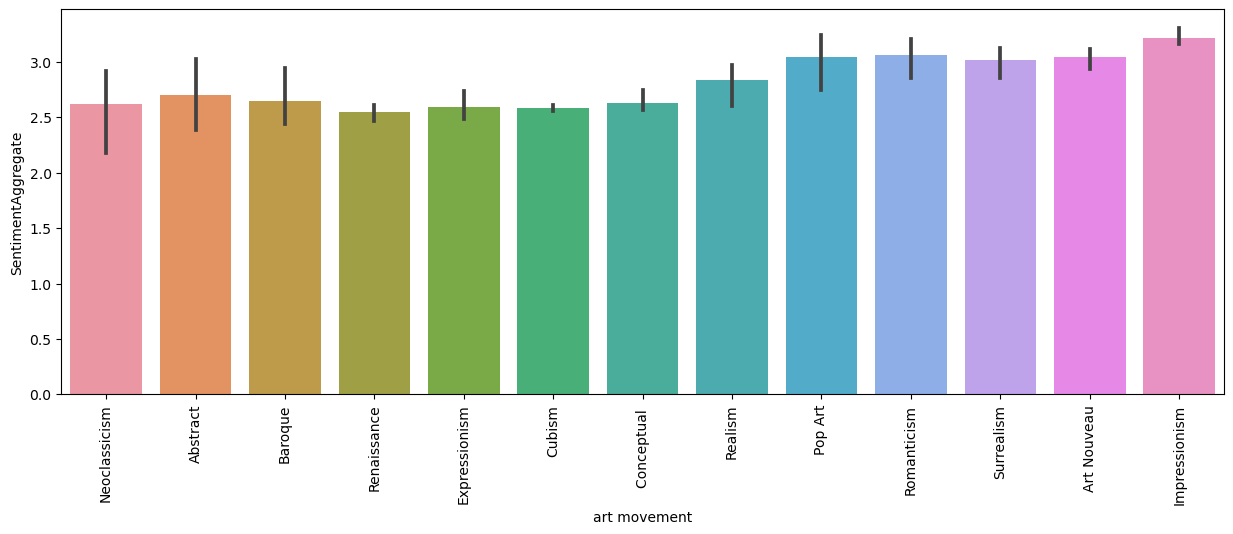

In [86]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=sentiment_data, x="art movement", y="SentimentAggregate", orient='v')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

<Axes: >

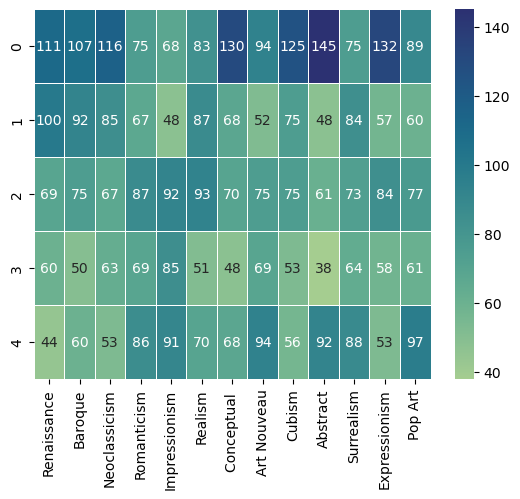

In [87]:
df = pd.read_csv('SA_1.csv')

# Correlation matrix
sns.heatmap(df, annot=True, fmt=".0f", linewidth=.5, cmap = "crest")


## Bonus: Analysing Detailed Artwork Descriptions

Out of curiousity, I wanted to see if breaking down the detailed formal qualities (line, shape, space, form, tone, texture, pattern, colour and composition) of the top 10 defining artworks of each movement would derive any interesting results.

In [88]:
from string import punctuation
print(punctuation)
print(len(punctuation))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
32


In [89]:
from collections import Counter

In [90]:
import nltk
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/skye/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/skye/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [91]:
!pip install spacy
!python -m spacy download en_core_web_sm 
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 16.9 MB/s eta 0:00:0000:0100:01


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.9 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [92]:
import spacy

In [93]:
spacy.load('en_core_web_lg')

In [94]:
# this text includes detailed descriptions from the top ten most famous impressionist paintings in history
impressionism_text = open("TenImpressionism.txt", encoding = 'utf-8').read()
print(impressionism_text[:])


Impression, Sunrise depicts the port of Le Havre at sunrise, the two small rowboats in the foreground and the red Sun being the focal elements. In the middle ground, more fishing boats are included, while in the background on the left side of the painting are clipper ships with tall masts. Behind them are other misty shapes that "are not trees but smokestacks of pack boats and steamships, while on the right in the distance are other masts and chimneys silhouetted against the sky."[4] In order to show these features of industry, Monet eliminated existing houses on the left side of the jetty, leaving the background unobscured.

Following the defeat of France in the Franco-Prussian War of 1870–71, the regeneration of France was exemplified in the thriving port of Le Havre.[7] Art historian Paul Tucker suggests that the contrast of elements like the steamboats and cranes in the background to the fishermen in the foreground represent these political implications: "Monet may have seen this p

In [95]:
print(impressionism_text.split())

['Impression,', 'Sunrise', 'depicts', 'the', 'port', 'of', 'Le', 'Havre', 'at', 'sunrise,', 'the', 'two', 'small', 'rowboats', 'in', 'the', 'foreground', 'and', 'the', 'red', 'Sun', 'being', 'the', 'focal', 'elements.', 'In', 'the', 'middle', 'ground,', 'more', 'fishing', 'boats', 'are', 'included,', 'while', 'in', 'the', 'background', 'on', 'the', 'left', 'side', 'of', 'the', 'painting', 'are', 'clipper', 'ships', 'with', 'tall', 'masts.', 'Behind', 'them', 'are', 'other', 'misty', 'shapes', 'that', '"are', 'not', 'trees', 'but', 'smokestacks', 'of', 'pack', 'boats', 'and', 'steamships,', 'while', 'on', 'the', 'right', 'in', 'the', 'distance', 'are', 'other', 'masts', 'and', 'chimneys', 'silhouetted', 'against', 'the', 'sky."[4]', 'In', 'order', 'to', 'show', 'these', 'features', 'of', 'industry,', 'Monet', 'eliminated', 'existing', 'houses', 'on', 'the', 'left', 'side', 'of', 'the', 'jetty,', 'leaving', 'the', 'background', 'unobscured.', 'Following', 'the', 'defeat', 'of', 'France',

In [96]:
len(impressionism_text)

30895

In [97]:
len(impressionism_text.split())

4981

In [98]:
print(set(impressionism_text.lower().split()))

{'some', 'subject,', 'thoughts,', '81', "renoir's", 'lorraine', 'passage', 'sensuality.', '×', 'circle,', 'animal', 'breaks', 'foreground.', 'if', 'movement.', 'features,', "sisley's", 'before', 'cartesian', 'natural', 'poised', 'azure', 'bourgeoisie', 'annoyed.[5]', '1841', 'portray', 'group.', 'billowing', 'tilted', 'glimmer', 'effects', 'until', 'sit', 'restricting', 'represented', 'unfortunate', 'scrapers.', 'renoir', 'depicts', 'mid-tones,', 'them,', 'career', 'relaxing', 'red', 'mirrored', '264.5', 'jean,', '"and', 'remained', 'epitomizes', 'glooming,', 'medium', '1834,', 'further', 'muse', 'playing', 'banquet', 'creativity.', 'daughter', 'haphazard', 'found', 'mentioned', 'leenhoff.', 'salon.', 'start,', 'she', 'olympia.', 'distinction', 'barges', 'definite', 'clark', 'draws', 'hazy', 'english', 'perceives', 'men', 'assure', '"aigre"', 'layered', '"vulgar".[2]', 'space', 'perspectival', 'slang', 'emotional', 'might', 'peers.', 'impertinence.', 'nude', 'densely', 'over', 'war', '

In [99]:
tokens = impressionism_text.lower().split()
print(tokens)

['impression,', 'sunrise', 'depicts', 'the', 'port', 'of', 'le', 'havre', 'at', 'sunrise,', 'the', 'two', 'small', 'rowboats', 'in', 'the', 'foreground', 'and', 'the', 'red', 'sun', 'being', 'the', 'focal', 'elements.', 'in', 'the', 'middle', 'ground,', 'more', 'fishing', 'boats', 'are', 'included,', 'while', 'in', 'the', 'background', 'on', 'the', 'left', 'side', 'of', 'the', 'painting', 'are', 'clipper', 'ships', 'with', 'tall', 'masts.', 'behind', 'them', 'are', 'other', 'misty', 'shapes', 'that', '"are', 'not', 'trees', 'but', 'smokestacks', 'of', 'pack', 'boats', 'and', 'steamships,', 'while', 'on', 'the', 'right', 'in', 'the', 'distance', 'are', 'other', 'masts', 'and', 'chimneys', 'silhouetted', 'against', 'the', 'sky."[4]', 'in', 'order', 'to', 'show', 'these', 'features', 'of', 'industry,', 'monet', 'eliminated', 'existing', 'houses', 'on', 'the', 'left', 'side', 'of', 'the', 'jetty,', 'leaving', 'the', 'background', 'unobscured.', 'following', 'the', 'defeat', 'of', 'france',

In [100]:
no_stops = []
for word in tokens:
    if word not in stopwords.words('english'):
        no_stops.append(word)
print(no_stops)

['impression,', 'sunrise', 'depicts', 'port', 'le', 'havre', 'sunrise,', 'two', 'small', 'rowboats', 'foreground', 'red', 'sun', 'focal', 'elements.', 'middle', 'ground,', 'fishing', 'boats', 'included,', 'background', 'left', 'side', 'painting', 'clipper', 'ships', 'tall', 'masts.', 'behind', 'misty', 'shapes', '"are', 'trees', 'smokestacks', 'pack', 'boats', 'steamships,', 'right', 'distance', 'masts', 'chimneys', 'silhouetted', 'sky."[4]', 'order', 'show', 'features', 'industry,', 'monet', 'eliminated', 'existing', 'houses', 'left', 'side', 'jetty,', 'leaving', 'background', 'unobscured.', 'following', 'defeat', 'france', 'franco-prussian', 'war', '1870–71,', 'regeneration', 'france', 'exemplified', 'thriving', 'port', 'le', 'havre.[7]', 'art', 'historian', 'paul', 'tucker', 'suggests', 'contrast', 'elements', 'like', 'steamboats', 'cranes', 'background', 'fishermen', 'foreground', 'represent', 'political', 'implications:', '"monet', 'may', 'seen', 'painting', 'highly', 'commercial'

In [101]:
impressionism_freq = Counter(no_stops)
impressionism_freq.most_common(15)

[('painting', 31),
 ('work', 18),
 ('impressionist', 16),
 ('black', 15),
 ('woman', 14),
 ('female', 13),
 ('one', 12),
 ('like', 11),
 ('also', 11),
 ('paris', 11),
 ('monet', 10),
 ('manet', 10),
 ('gaze', 10),
 ('family', 9),
 ('two', 8)]

### Lack of stopwords resources

<br> Due to the relatively niche field of textual art research, I wasn't able to find stopwords for art. As seen above, the regular stopwords list does not seem to suffice at the moment. Hence, I regrettably decided to give up on this part of the investigation for now. 

<br> Regardless, I'll definitely continue to work on a list of stopwords for future research endeavours!

# Project Findings & Roadblocks

## Main Dataset
The final model appears to be aligned with my personal observations of art world -- the value of the artwork is often largely dependent on external factors such as the status of the artist. 

By categorizing artworks, regardless of their year of creation, based on their formal qualities into art movements, we were able to find recognizable trends within each distinctive art style. Though it is definitely a generalization to group artworks into specific art movements based on their style, it maintains the focus on our research - to identify and valuate the recognizable elements and motifs of an artwork rather than their extrinsic value.

Unfortunately, at this point of our research, I only managed to reinforce the current commonly held assumptions of the art market. Given more time, access and a better grasp on these digital tools, I believe that the direction of this project promises beneficial insights into an alternative metric for fair art valuation.


#### Roadblocks
Through this research, I realized the inaccessibility of even the most basic information on the process of valuation of art, furthermore their actual sales prices. The lack of transparency in this industry definitely played a huge part in my overall project findings as it obscured the potential accuracy and insights that could've been derived from a clean and (hopefully) much bigger dataset.

Creating a Machine learning model was insanely difficult as it was challenging to even understand what was going on under hood of the code. Even after rigorously searching for a relevant pre-built model to base my project on, I was unable to find anything close to an exact fit. So I ended up cherry-picking code from a multitude of stock price prediction models and modifying them to suit my needs.

(To be completely honest, I still don't fully comprehend what each and every syntax does. I simply cross my fingers every time I run a kernel and pray that it finally works. Spoiler alert: it never does...) 


## Secondary Dataset
It seems that Beauty is indeed the eye of the beholder. The aggregrated preferences tend to hover around 2.5 - 3.0, suggesting that the average person has ambivalence to mild preference across the major art movements.

The heatmap shows that both abstract art is the most polarizing: with people either loving it or absolutely hating it. (which I kind of agree.) 


#### Roadblocks
The secondary dataset required heavy amounts of manual adjustments and synthesis due to the its raw nature. I had a tough time finding the right visualization to best represent the data in both itsm raw and refined form. 


## Bonus Text Dataset
I included this bonus dataset as an attempt to see if I could derive any notable conclusions, that I could then use to plot against findings from the Main Dataset. 

Through my expedition to find quality textual art datasets online, I was shocked but not surprised at how few there were. Originally, I wanted to heavily utilize textual analysis to identify more instrinsic qualities of each artwork. However, there was simply no way for me to proceed with my agenda without the proper data available. 

# References


<br> Prown, Jules David. "Mind in matter: An introduction to material culture theory and method." Winterthur Portfolio 17, no. 1 (1982): 1-19.

<br> Greenwald, Richard. "The Art of Value: Reflections on Art Market Watch." Art + Auction 35, no.7 (2012): 56-59.

<br> Boyd, D. and Crawford, K. Critical questions for big data: Provocations for a cultural, technological, and scholarly phenomenon. Information, Communication & Society, 15(5), 2012, pp. 662–679, https://doi.org/10.1080/1369118X.2012.678878

<br> Prown, Jules David. Art As Evidence: Writings On Art and Material Culture. New Haven, CT, Yale University Press, 2001.

<br> Greenwald, D. (2021). Painting-By-Numbers. Retrieved June 18, 2023.
https://github.com/dsg2123/Painting-by-Numbers





<br><b> Sites that helped me tide through it all:

https://github.com/flo7up/relataly-public-python-tutorials/tree/master
    
https://sebastianappelt.com/category/machine-learning/
    
https://pythonbasics.org/seaborn-pairplot/
    
https://seaborn.pydata.org/generated/seaborn.heatmap.html
    
https://www.w3schools.com/python/python_exercises.asp
    
https://blog.quantinsti.com/creating-heatmap-using-python-seaborn/
